#### Import Libraries

In [1]:
library(ISLR)
library(dplyr)
library(glmnet)
library(leaps)
library(tidyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: Matrix

Loaded glmnet 4.0


Attaching package: 'tidyr'


The following objects are masked from 'package:Matrix':

    expand, pack, unpack




In [2]:
length(colnames(soccer_data))

ERROR: Error in is.data.frame(x): object 'soccer_data' not found


#### Import Data

In [ ]:
soccer_data <- read.csv('Datasets/players_20.csv')
soccer_data <- soccer_data[soccer_data$team_position == 'ST',]
soccer_data <- soccer_data[soccer_data$wage_eur > 16000,]

In [ ]:
soccer_da <- soccer_data[ -c(1:9, 10:13, 15:44, 73:104) ]


In [ ]:
reg = lm(log(wage_eur) ~ ., data = soccer_da)

In [ ]:
summary(reg)

In [ ]:
plot(soccer_da$power_jumping, log(soccer_da$wage_eur))

In [ ]:
regfit_full = regsubsets(log(wage_eur)~., data = soccer_da, nvmax = 19)

In [3]:
summary(regfit_full)

ERROR: Error in summary(regfit_full): object 'regfit_full' not found


In [4]:
regfit_full


ERROR: Error in eval(expr, envir, enclos): object 'regfit_full' not found


In [5]:
plot(regfit_full, scale = "adjr2", main = "Adjusted R^2")


ERROR: Error in plot(regfit_full, scale = "adjr2", main = "Adjusted R^2"): object 'regfit_full' not found


In [6]:
set.seed(1)
train = soccer_da %>%
sample_frac(0.5)

test = soccer_da %>%
setdiff(train)

x_train = model.matrix(wage_eur~., train)[,-1]
x_test = model.matrix(wage_eur~., test)[,-1]

ERROR: Error in eval(lhs, parent, parent): object 'soccer_da' not found


In [7]:
y_train = train %>%
select(wage_eur) %>%
unlist() %>%
as.numeric()
y_test = test %>%
select(wage_eur) %>%
unlist() %>%
as.numeric()

ERROR: Error in eval(lhs, parent, parent): object 'train' not found


In [8]:
grid = 10^seq(10, -2, length = 100)
lasso_mod = glmnet(x_train, y_train,
alpha = 1,
lambda = grid) # Fit lasso model on training data
plot(lasso_mod,xvar="lambda") # Draw plot of coefficients

ERROR: Error in glmnet(x_train, y_train, alpha = 1, lambda = grid): object 'x_train' not found


In [9]:
set.seed(1)
cv.out = cv.glmnet(x_train, y_train, alpha = 0) # Fit ridge regression model on training data
bestlam = cv.out$lambda.min # Select lamda that minimizes training MSE
bestlam

ERROR: Error in nrow(x): object 'x_train' not found


In [10]:
out = glmnet(x_train, y_train, alpha = 1, lambda = grid) # Fit lasso model on full dataset
lasso_coef = predict(out, type = "coefficients", s = bestlam)[1:20,] # Display coefficients using lambda lasso_coef
lasso_coef

ERROR: Error in glmnet(x_train, y_train, alpha = 1, lambda = grid): object 'x_train' not found


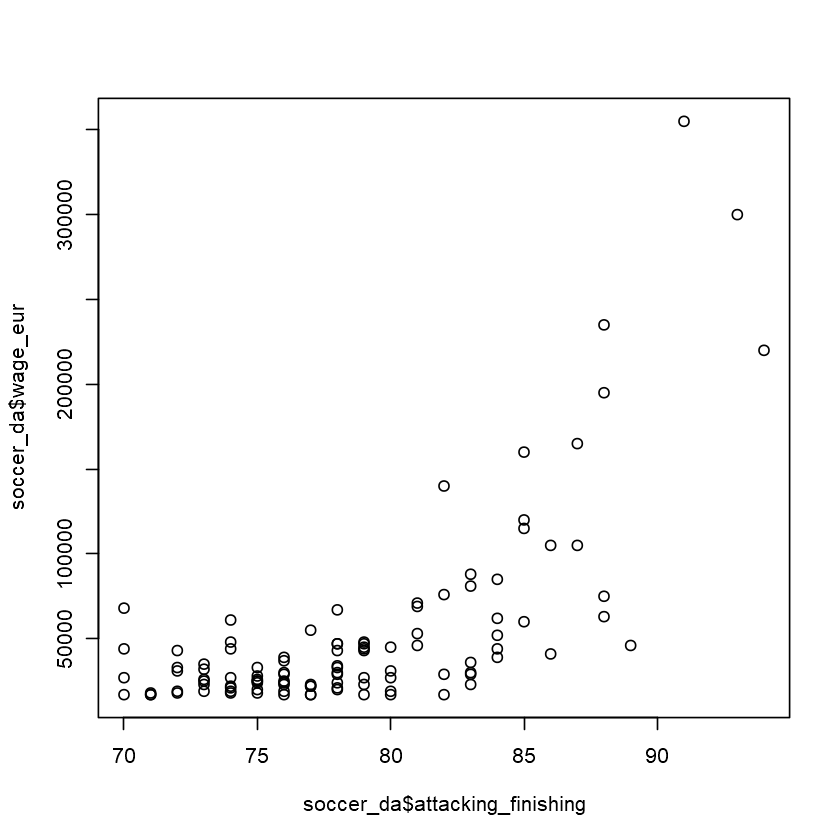

In [98]:
plot(soccer_da$attacking_finishing, soccer_da$wage_eur)